<a href="https://colab.research.google.com/github/Source123-commits/Image_classification_CNN/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Image_classification_CNN/data


bike  cats  horses  human


In [ ]:
#Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import time
from PIL import Image

#Set up data paths and transformations
data_dir = "/content/drive/MyDrive/Image_classification_CNN/data"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


In [ ]:
#Load Dataset and Split into Train/Test
dataset = datasets.ImageFolder(data_dir, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"Total images: {len(dataset)}")
print(f"Training images: {len(train_dataset)}")
print(f"Testing images: {len(test_dataset)}")
print(f"Classes: {dataset.classes}")


Total images: 971
Training images: 776
Testing images: 195
Classes: ['bike', 'cats', 'horses', 'human']


In [ ]:
#  Load Pretrained VGG16 and Modify Final Layer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16(pretrained=True)

# Freeze feature layers
for param in model.features.parameters():
    param.requires_grad = False

# Modify classifier for 4 classes
model.classifier[6] = nn.Linear(4096, 4)
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#  Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.0001)


In [ ]:
#  Training Loop
num_epochs = 3
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    print(f"Epoch {epoch+1}: Loss = {running_loss/len(train_loader):.4f}, Accuracy = {train_acc:.2f}%")

print(f"\nTotal Training Time: {time.time() - start_time:.2f} seconds")


Epoch 1: Loss = 0.0650, Accuracy = 98.45%
Epoch 2: Loss = 0.0004, Accuracy = 100.00%
Epoch 3: Loss = 0.0001, Accuracy = 100.00%

Total Training Time: 1786.03 seconds


In [ ]:
# Testing Loop
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_acc = 100. * correct / total
print(f"\nTest Accuracy: {test_acc:.2f}%")



Test Accuracy: 98.97%


In [ ]:
# Assuming this was already done earlier in your code:
train_data = datasets.ImageFolder(data_dir, transform=transform)
class_names = train_data.classes  # This is the list: ['bike', 'cats', 'horses', 'human']


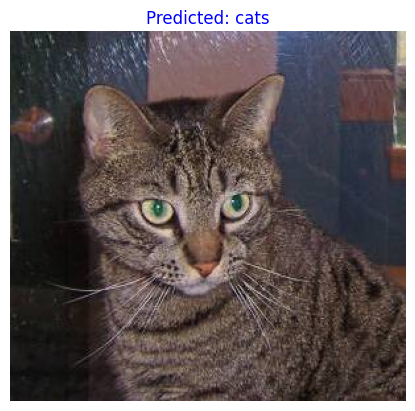

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to predict single image
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(img)
        _, predicted = torch.max(output, 1)

    class_name = train_data.classes[predicted.item()]
    plt.imshow(image)
    plt.title(f"Predicted: {class_name}", color='blue')
    plt.axis('off')
    plt.show()

# Example usage
predict_image("/content/drive/MyDrive/Image_classification_CNN/data/cats/cat.1.jpg")
